# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

<a id="1"><h1>Reading the data</h1></a>

In [3]:
df= pd.read_csv('/kaggle/input/credit-card/Creditcard_data.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<a id="2"><h1>Checking the Class Distribution</h1></a>

<Axes: xlabel='Class', ylabel='count'>

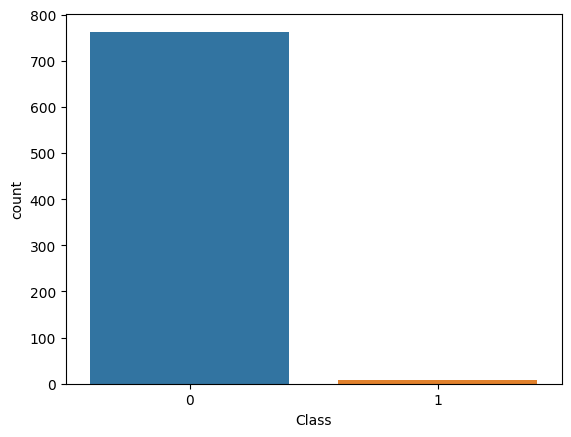

In [7]:
sns.countplot(data= df, x= 'Class')

**It can be clearly observed that the dataset is unbalanced.**

In [8]:
df['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

<a id="3"><h1>Balancing the Dataset</h1></a>

<Axes: xlabel='Class', ylabel='count'>

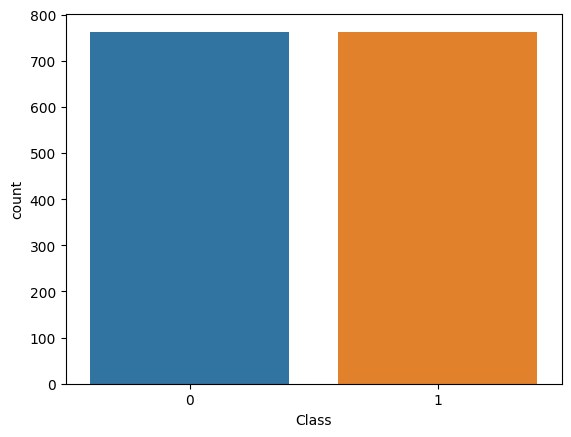

In [9]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)                    # balancing the dataset through oversampling

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [10]:
resampled_df['Class'].value_counts()

Class
0    763
1    763
Name: count, dtype: int64

<a id="4"><h1>Applying Different Sampling Methods</h1></a>

<a id="5"><h3>Simple Random Sampling</h3>

In [11]:
# z score
z= 1.96                 # assuming confidence value of 0.95

# estimated proportion of the population with the characteristic of interest
p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763) 

# margin of error
E= 0.05                 # 1 - (confidence value)

In [12]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [13]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)

In [14]:
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1,265,-0.293839,-0.044369,1.093146,-1.576473,-0.107492,-0.791217,0.291465,-0.093164,-1.406366,...,-0.235571,-0.286207,0.069303,0.107632,-0.385142,0.866055,-0.017603,0.039893,24.84,0
2,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
3,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


<a id="6"><h3>Systematic Sampling</h3></a>

In [15]:
# no. of elements after which an element is selected
k= 5
#k= int(np.sqrt(len(resampled_df)))

In [16]:
sample_size= len(resampled_df)//k
sample_size

305

In [17]:
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)

In [18]:
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


<a id="7"><h3>Stratified Sampling</h3></a>

In [19]:
# z score
z= 1.96                 # assuming confidence value of 0.95

# estimated proportion of the population with the characteristic of interest
p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763) 

# margin of error
E= 0.05                 # 1 - (confidence value)

# number of strata
S= 2                    # no. of classes

In [20]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

1537

In [21]:
len(resampled_df)

1526

In [22]:
#sample_size*100/len(resampled_df)

In [23]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)

/tmp/ipykernel_33/3029369577.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)


In [24]:
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,55,-0.773450,0.853112,0.818254,-0.236070,0.803463,-1.438728,0.799479,-0.007989,-0.761090,...,0.035362,-0.116890,-0.178926,0.400155,-0.026231,0.165156,0.027762,0.132980,0.76,0
1,225,1.478773,-0.551089,-0.523152,-0.831153,-0.195413,-0.289193,-0.279252,-0.205606,-0.647806,...,0.071144,0.210635,-0.356278,-0.954151,0.963445,0.019195,-0.016289,-0.006384,34.00,0
2,273,-0.792970,0.273688,2.612040,1.213495,-0.225015,-0.594575,-0.250744,0.162628,0.038633,...,0.136200,0.381140,-0.020689,0.706053,-0.234172,-0.377185,0.164555,0.155042,6.51,0
3,82,-0.888004,0.913670,1.146088,0.656290,0.677272,-0.326211,0.888811,-0.341848,-0.523849,...,0.107833,0.661993,-0.004713,0.031097,-0.140882,-0.373698,-0.157921,0.076529,5.90,0
4,68,1.156939,0.037215,0.556799,0.519507,-0.479754,-0.352714,-0.222487,0.158242,0.011252,...,-0.182662,-0.612268,0.197305,0.174883,0.032497,0.099480,-0.026816,0.004199,2.69,0


**We can perform stratified sampling by another simpler approach while also creating a test set on which we will compute the accuracy score of each model.**

In [25]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [26]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [27]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,355,1.085840,0.126686,0.498972,1.333700,-0.199129,0.032644,-0.015574,0.116091,0.015999,...,-0.029953,0.087509,-0.059209,0.245501,0.601876,-0.344061,0.034199,0.009880,19.64,0
1,140,-3.222745,-1.932776,2.923242,0.143574,0.948117,-1.076456,0.811226,-1.170683,1.363753,...,-0.657897,0.983985,1.304693,0.804414,0.686028,0.455321,-0.373342,-1.325164,11.00,0
2,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
3,548,-2.565417,1.285936,1.446036,0.685430,0.496797,0.970669,-1.994767,-5.916808,0.893287,...,5.200062,-1.191485,-0.057648,-0.457314,-0.492138,-0.330366,0.404640,-0.378188,41.96,0
4,493,1.219725,-0.481149,-0.324351,-1.552562,-0.258357,-0.519342,-0.035458,-0.117824,1.267125,...,-0.040428,-0.106938,-0.171758,-0.721597,0.525568,0.084212,-0.001621,0.011866,67.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1064,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1065,430,1.331282,-0.460775,0.201621,-0.582848,-0.815358,-0.863857,-0.272425,-0.228814,-1.194789,...,0.239532,0.718030,-0.181652,0.617561,0.760131,-0.100635,-0.009469,0.001407,30.00,0
1066,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


In [28]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64,0.959602,0.370711,0.888613,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,...,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
1,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
3,47,1.197839,0.236828,0.509605,0.657659,-0.365488,-0.745101,0.079497,-0.130536,-0.052263,...,-0.149876,-0.374211,0.145516,0.414984,0.212156,0.181724,-0.016402,0.015994,3.63,0
4,180,-0.782666,1.017987,1.505851,0.920905,0.758765,0.392475,1.357625,-0.666453,1.071130,...,-0.410457,0.145970,-0.248113,-0.452121,0.014228,-0.281961,0.118371,-0.508471,23.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,294,-0.745116,0.446440,1.714154,-0.146626,-0.244287,-0.963058,0.566537,-0.044998,0.274475,...,-0.149227,-0.440704,0.088860,0.708177,-0.570540,0.036992,-0.041732,0.182178,33.33,0
454,459,1.294157,1.132084,-2.148605,1.230031,1.447894,-0.767676,0.575635,-0.094475,-0.454617,...,-0.257463,-0.726440,-0.374828,-1.358994,0.968892,-0.225584,0.027084,0.071322,2.99,0
455,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
456,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [29]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

<a id="8"><h3>Cluster Sampling</h3></a>

In [30]:
# # z score
# z= 1.96                 # assuming confidence value of 0.95

# # estimated proportion of the population with the characteristic of interest
# p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763) 

# # margin of error
# E= 0.05                 # 1 - (confidence value)

# # average size of clusters
# C= 50            

In [31]:
# sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
# sample_size

In [32]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [33]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [34]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,310,-0.728857,-0.020542,1.415026,1.233902,-0.240077,0.482240,1.315730,-0.010903,-0.360987,...,0.154089,0.339031,0.372442,0.172197,-0.230872,-0.363260,-0.067174,-0.066832,222.50,0
1,247,-0.685770,0.554019,2.014829,-0.561033,0.683347,0.002232,0.804394,-0.154563,0.339900,...,0.113873,0.642716,-0.421980,-0.411622,0.359461,-0.545006,-0.040244,-0.096934,18.94,0
2,17,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0
3,270,-1.356935,0.033724,1.874195,-1.469102,-3.125909,1.677056,-4.925568,-7.494658,-1.278470,...,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,0
4,492,-0.789890,-1.379371,0.171334,-1.636756,-2.807266,0.726236,2.737602,-0.933999,-2.413730,...,-0.256231,0.167077,0.540876,0.067496,0.479636,-0.098230,0.053527,-0.408050,632.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
996,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
997,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
998,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1


<a id="9"><h3>Bootstrap Sampling</h3></a>

In [35]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement from the resampled dataset
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [36]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [37]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,427,-0.856567,0.842156,1.716677,-0.016178,1.054486,-0.440338,1.463574,-0.378757,-0.728544,...,0.049032,0.297741,-0.456502,0.197724,0.610523,-0.420531,-0.458258,-0.381306,12.98,0
1,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
2,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
3,379,-1.896099,-1.829046,1.181222,3.897846,-1.686469,1.976371,-0.564107,-2.400465,-0.979202,...,-0.936346,-0.516626,-0.911682,0.025106,0.656699,0.200868,-0.088994,0.339814,881.13,0
4,263,1.143649,0.128210,0.407255,1.160950,-0.504532,-0.904843,0.111993,-0.151667,0.180408,...,-0.036001,-0.221754,-0.049750,0.345483,0.495658,-0.440443,0.008209,0.031689,49.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1522,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1523,541,-0.623525,0.176955,2.565715,1.544280,0.109686,0.055218,0.259801,-0.192566,-0.320106,...,0.387800,1.408297,0.019451,0.545551,-1.357580,-0.332164,-0.138540,-0.200151,67.10,0
1524,171,-0.365532,1.006932,1.108304,-0.428694,0.590513,0.105474,0.602926,0.132310,-0.636398,...,-0.250031,-0.663325,-0.189399,-0.845682,-0.055760,0.124845,0.263525,0.099579,0.89,0


<a id="10"><h1>Training on Different Models</h1></a>

In [38]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
nb_model= GaussianNB()

In [39]:
models= [lr_model,knn_model,rf_model,dt_model,nb_model]
model_names= ['Linear Regression','KNN','Random Forest','Decision Tree','Naive Bayes']

In [40]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [41]:
test_samples= []

In [42]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [43]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [44]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
Linear Regression,0.709607,0.69869,0.71179,0.71179,0.713974
KNN,0.5,0.5,0.5,0.5,0.39738
Random Forest,0.5,0.5,0.5,0.5,0.5
Decision Tree,0.497817,0.467249,0.582969,0.548035,0.5
Naive Bayes,0.628821,0.578603,0.582969,0.582969,0.497817


<h1>Thank You!</h1>